# MWS Secondary Target Selection

## MWS_SPECIAL_HYADES_SV

Maintainers:
  - Boris Gaensicke (selection/catalog)
  - Andrew Cooper (secondary target code)

In [1]:
ls ../raw

desi_sv_hyades.fits


In [2]:
pwd

'/global/projecta/projectdirs/desi/external/mws/sv/MWS_SPECIAL_HYADES_SV/1/code'

Stars in the Hyades; selected all stars in Gaia with parallax distance < 100pc in a 15x15 deg box centred on the cluster.

The selection criteria are:

???

In [3]:
pwd

'/global/projecta/projectdirs/desi/external/mws/sv/MWS_SPECIAL_HYADES_SV/1/code'

In [4]:
import os
import numpy as np
from astropy.table import Table, Column
import astropy.coordinates as coord
import astropy.units as u
import astropy.io.fits as fits

In [11]:
target_class    = 'MWS_SPECIAL_HYADES_SV'
input_filename  = 'desi_sv_hyades.fits'

REF_CAT   = 'G'
REF_EPOCH = '2015.5'

In [12]:
# Relative paths
input_path  = os.path.join('..','raw',input_filename)

# Separate bright and faint output
output_path = os.path.join('..','indata','{}.fits'.format(target_class))

output_dir  = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    print('Making output directory: {}'.format(os.path.abspath(output_dir)))
    os.makedirs(dir)

In [17]:
import astropy.table as table
d = table.Table.read(input_path)
d[0:3]

ra,ra_error,dec,dec_error,source_id,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,duplicated_source,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_g_mean_mag_error,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_bp_mean_mag_error,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,phot_rp_mean_mag_error,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val
deg,mas,deg,mas,,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,mag,km / s,km / s,K,mag,mag,solRad,solLum
float64,float64,float64,float64,int64,float64,float32,float64,float32,float64,float32,uint8,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float32,float32,float32,float64
60.7,1.8426,13.7,0.7897,38884778472408320,12.2866,1.9908,25.651,4.350,-12.214,1.868,0,8.4671e+01,8.7516e-01,20.8690,0.0112,3.7630e+01,9.2080e+00,21.4125,0.2657,1.1963e+02,9.9576e+00,19.5673,0.0904,1.8452,nan,nan,nan,nan,nan,nan,nan
61.0,0.1082,13.9,0.0438,38895090691331072,11.2995,0.1148,-16.924,0.253,63.262,0.103,0,6.4261e+03,3.9913e+00,16.1685,0.0007,9.9465e+02,6.9610e+00,17.8572,0.0076,8.7211e+03,1.3909e+01,14.9105,0.0017,2.9467,nan,nan,3643.05,0.0283,0.0188,nan,nan
60.6,2.7388,14.0,0.9461,38904397883226624,10.5274,3.4074,7.164,3.348,-0.098,1.341,0,9.2846e+01,7.8308e-01,20.7690,0.0092,4.6438e+01,7.3086e+00,21.1842,0.1709,9.5419e+01,8.9810e+00,19.8128,0.1022,1.3714,nan,nan,nan,nan,nan,nan,nan


In [18]:
print(d.colnames)

['ra', 'ra_error', 'dec', 'dec_error', 'source_id', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_g_mean_mag_error', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error', 'phot_bp_mean_mag', 'phot_bp_mean_mag_error', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error', 'phot_rp_mean_mag', 'phot_rp_mean_mag_error', 'bp_rp', 'radial_velocity', 'radial_velocity_error', 'teff_val', 'a_g_val', 'e_bp_min_rp_val', 'radius_val', 'lum_val']


In [19]:
BRIGHT_TIME_BRIGHT_LIMIT = 16.0

finite_mag                 = np.isfinite(d['phot_g_mean_mag'])
brighter_than_bright_limit = (d['phot_g_mean_mag'] < BRIGHT_TIME_BRIGHT_LIMIT) & finite_mag
fainter_than_bright_limit  = (d['phot_g_mean_mag'] > BRIGHT_TIME_BRIGHT_LIMIT) & finite_mag

print('Undefined mags for {:d} targets'.format((~finite_mag).sum()))
print('Mag range: {:5.2f} < G < {:5.2f}'.format(d['phot_g_mean_mag'][finite_mag].min() ,d['phot_g_mean_mag'][finite_mag].max()))
print('Targets brighter than G = 16: {}/{} ({:3.2%})'.format(brighter_than_bright_limit.sum(),
                                                             len(d),
                                                             brighter_than_bright_limit.sum()/len(d)))

bright_time_targets = fainter_than_bright_limit

Undefined mags for 0 targets
Mag range:  3.16 < G < 20.99
Targets brighter than G = 16: 1042/1691 (61.62%)


In [21]:
bright_time_targets = fainter_than_bright_limit

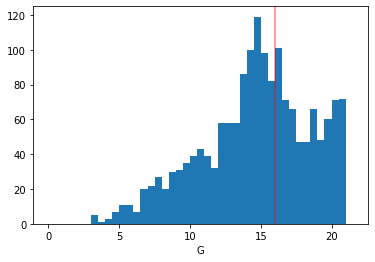

In [41]:
import matplotlib.pyplot as pl
pl.hist(d['phot_g_mean_mag'][finite_mag],bins=np.arange(0,22,0.5));
pl.xlabel('G');
pl.axvline(BRIGHT_TIME_BRIGHT_LIMIT,c='r',alpha=0.5);

Adjust to secondary target data model:

In [42]:
output = d['ra','dec','pmra','pmdec','source_id'][bright_time_targets]

for cn_old,cn_new in zip(['ra','dec','source_id','pmra','pmdec'],['RA','DEC','REF_ID','PMRA','PMDEC']):
    output.rename_column(cn_old,cn_new) 

output.add_column(Column(np.repeat(False,len(output)),'OVERRIDE'))
#output.add_column(Column(np.zeros(len(output),dtype=np.float32),'PMRA'))
#output.add_column(Column(np.zeros(len(output),dtype=np.float32),'PMDEC'))
output.add_column(Column(np.repeat(REF_CAT,len(output)),'REF_CAT'))
output.add_column(Column(np.repeat(REF_EPOCH,len(output)),'REF_EPOCH'))

Add header:

In [43]:
output.meta['VRAWDATA'] = int(os.path.abspath(input_paths[0]).split(os.path.sep)[-3])

In [44]:
output[0:3]

RA,DEC,PMRA,PMDEC,REF_ID,OVERRIDE,REF_CAT,REF_EPOCH
deg,deg,mas / yr,mas / yr,,,,
float64,float64,float64,float64,int64,bool,str1,str6
60.7,13.7,25.651,-12.214,38884778472408320,False,G,2015.5
61.0,13.9,-16.924,63.262,38895090691331072,False,G,2015.5
60.6,14.0,7.164,-0.098,38904397883226624,False,G,2015.5


Write output:

In [45]:
print('Writing {:d} rows of output to {}'.format(len(output),os.path.abspath(output_path)))
output.write(output_path,overwrite=True)

Writing 649 rows of output to /global/projecta/projectdirs/desi/external/mws/sv/MWS_SPECIAL_HYADES_SV/1/indata/MWS_SPECIAL_HYADES_SV.fits
